In [1]:
from starter import *
from anneal import *
import math
import multiprocess as mp
import copy, random
from collections import defaultdict, Counter
import itertools
from bs4 import BeautifulSoup
import requests
from heapq import heapify, heappop, heappush
tar('outputs', overwrite = True)

/opt/homebrew/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('best_scores.csv')
sum(df['score'] > 200000)

50

In [3]:
tar('outputs', overwrite = True)

In [4]:
def get_all_low():
    f = open('all.txt', 'r')
    
    lines = f.readlines()
    names = []
    for line in lines:
        size, num = line.strip().split()
        names.append((size+num+'.in', size, num))
    return names
low_scores_all = get_all_low()
len(low_scores_all)

559

In [5]:

def apply_pi(G, pi):
    num_v = len(G.nodes)
    assert num_v == len(pi)
    max_p = max(pi)

    p = list(Counter(pi))
    p.sort()
    map_p = {p[i]:i for i in range(len(p))}
    for v in range(num_v):
        G.nodes[v]['team'] = int(map_p[pi[v]] + 1)
    return G  

In [8]:
solved = []
for file,target,k in (targets):
    df = pd.read_csv('best_scores.csv')
    r = df.index[df['name'] == file]
    min_cost = float(df.iloc[r]['score'])
    if min_cost <= target:
        solved.append((file, min_cost, target))
len(solved)

41

In [30]:
def write(instance, in_file, out_file, file_name, cost, k, overwrite):
    df = pd.read_csv('best_scores.csv')
    r = df.index[df['name'] == file_name]
    original = float(df.loc[r, 'score'])
    assert cost < original
    df.loc[r, 'score'] = cost
    df.loc[r, 'k'] = k
    df.to_csv('best_scores.csv', index=False)
    print(f"{str(in_file)}: cost", original, '->',score(instance))
    write_output(instance, out_file, overwrite)

In [28]:
df2 = pd.read_csv('best_scores_first.csv')


In [ ]:
for file, cost_my, cost_target in targets:
    G = read_input('inputs/'+file)
    f_my = open(str(Path('outputs') / f"{file[:-len('.in')]}.out"))
    f_first = open(str(Path('outputs_firsthalf') / f"{file[:-len('.in')]}.out"))
    pi_my = json.load(f_my)
    apply_pi(G, pi_my)
    score_my = score(G)
    
    pi_first = json.load(f_first)
    apply_pi(G, pi_first)
    score_first = score(G)
    
    r = df.index[df['name'] == file]
    k = int(df.loc[r, 'k'])
    
    if score_first < score_my:
        write(G,'inputs/'+file,str(Path('outputs') / f"{file[:-len('.in')]}.out"), file, score_first,k, True)
    f_my.close()
    f_first.close()

In [7]:
def get_targets(file):
    f = open(file, 'r')
    lines = f.readlines()
    targets = []
    for line in lines:
        name, num, k = line.strip().split()
        targets.append((name, float(num), int(k)))
    return targets
targets = get_targets('target_soln_new.txt')

In [14]:
# import library

# Request to website and download HTML contents
target_scores = []
for filename, size, num in tqdm(low_scores_all):
    url='https://170-leaderboard.vercel.app/input/'+size+'/'+ num
    req=requests.get(url)
    content=req.text
    soup=BeautifulSoup(content)
    raw = soup.findAll('td')[2].text
    target = float(raw)+0.05
    target_scores.append([filename,target])

100%|██████████| 559/559 [02:48<00:00,  3.32it/s]


In [28]:
target_scores = [[name,score] for name,score in target_scores.items()]

In [16]:

df = pd.read_csv('best_scores.csv')
    
for i in range(len(target_scores)):
    filename, target = target_scores[i][:2]
    approx = 2*np.log(target/100)
    k = math.floor(approx)
    r = df.index[df['name'] == filename]
    num_p = int(df.iloc[r]['k'])
    if abs(k-num_p) > 3:
        k = num_p
    target_scores[i] = [filename, str(target),str(k)]

In [18]:
f = open("target_soln_new.txt", "w")
for line in target_scores:
    f.write(line[0] + ' ' + line[1] + ' ' + line[2])
    f.write('\n')
f.close()


In [33]:
targets = []
def get_targets(file):
    f = open(file, 'r')
    lines = f.readlines()
    targets = []
    for line in lines:
        name, num, k = line.strip().split()
        targets.append((name, float(num), int(k)))
    return targets
targets = get_targets('target_soln_new.txt')
len(targets)

559

In [63]:
G = read_input('inputs/medium160.in')
G_c = nx.complement(G)


In [86]:
score(G)

698752.8188588734

In [ ]:
pi= [G.nodes[v]['team'] for v in G.nodes]
pi

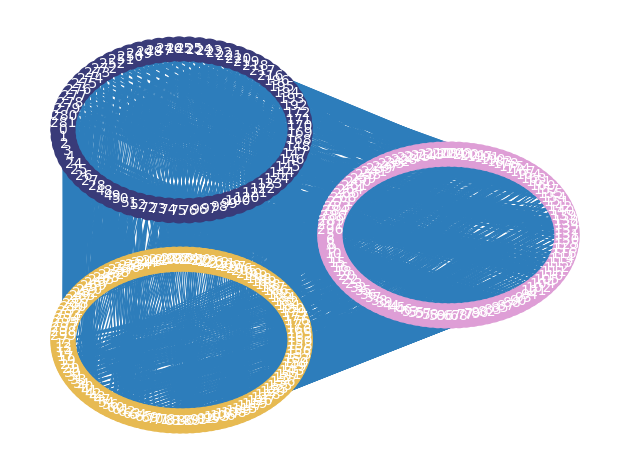

In [85]:
visualize(G)

In [77]:
cliques = nx.find_cliques(G_c)

In [76]:
nx.average_clustering(G_c)

0.9377624666295248

In [78]:
c1 = next(cliques)
len(c1)

73

In [70]:
left = list(set(G.nodes).difference(set(c1)))

In [71]:
cliques_left = nx.find_cliques(G_c, left)

In [83]:
np.random.randint(2, size=10)

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 0])

In [84]:
cliques = nx.find_cliques(G_c)
c1 = next(cliques)
c1 = set(c1)
for v in G.nodes:
    if v in c1:
        G.nodes[v]['team'] = 1
    else:
        G.nodes[v]['team'] = 2 + np.random.randint(2)
# c12 = c1+c2
# c12 = set(c12)
# for v in G.nodes:
#     if v not in c12:
#         G.nodes[v]['team'] = 3

In [30]:
c2 = next(cliques)

In [31]:
len(c2)

73

In [23]:
bi = nx.make_clique_bipartite(G_c)

KeyboardInterrupt: 

In [9]:
class GraphPartitioner(Annealer):
    class StateObject:
        def __init__(self, k):
            self.k = 0
            self.p = [0 for _ in range(k)]
            self.pi = [0 for _ in range(k)]
            self.norm_b = 0
            self.cost_p, self.cost_w, self.cost_k = 0, 0, 0
            self.total_cost = 0
            self.counter = 0
        def get_scores(self):
            return self.cost_w, self.cost_k, self.cost_p, self.total_cost
        
    def __init__(self, Graph: nx.Graph, k):
        
        self.G = Graph
        self.num_v = len(self.G.nodes)
        self.max_p = k
        self.state = self.StateObject(self.max_p)

        ### Below are all state variables
        # self.k_way_random_part() # remember to add 1 to pi at the very end so no team is assigned 0
        self.partition()
        
        b = [self.get_b_val(i) for i in range(len(self.state.p))]
        self.state.norm_b = np.linalg.norm(b)
        
        self.state.cost_p = math.exp(70 * self.state.norm_b)
        self.compute_cost_w_initial()
        self.compute_cost_k()
        self.state.total_cost = self.state.cost_k + self.state.cost_p + self.state.cost_w

        super(GraphPartitioner, self).__init__(self.state)  # important!
    
    def partition(self):
        self.state.pi = [0 for i in range(self.num_v)]

        g_nodes = set(self.G.nodes)
        for i in range(self.max_p):
            iset = nx.algorithms.approximation.maximum_independent_set(self.G)
            g_nodes = g_nodes.difference(iset)
            for v in iset:
                self.state.pi[v] = i
        
        
        
        self.state.k = len(set(self.state.pi))

        for v in range(self.num_v):
            self.state.p[self.state.pi[v]] += 1
            
    def get_b_val(self, i):
        return self.state.p[i]/self.num_v - 1/self.state.k

    ### Sets up the teams in G and the b vector
    def k_way_random_part(self):
        self.state.pi = [i % self.max_p for i in range(self.num_v)]
        np.random.shuffle(self.state.pi)
        # self.state.pi = np.random.randint(self.max_p, size=len(self.num_v))
        self.state.k = len(set(self.state.pi))

        for v in range(self.num_v):
            self.state.p[self.state.pi[v]] += 1

    def compute_cost_k(self):
        self.state.cost_k = 100 * math.exp(self.state.k * 0.5)

    def compute_cost_p_on_swap(self, i, j):
        b_i, b_j = self.get_b_val(i), self.get_b_val(j)
        new_norm_b_squared = self.state.norm_b**2 - b_i**2 - b_j**2 + (b_i-1/self.num_v)**2 + (b_j+1/self.num_v)**2
        
        if math.isclose(new_norm_b_squared, 0, abs_tol=1e-9):
            new_norm_b_squared = 0
        self.state.norm_b = new_norm_b_squared ** 0.5
        self.state.cost_p = math.exp(70 * self.state.norm_b)
    
    def compute_cost_p_from_scratch(self):
        b = [i/self.num_v - 1/self.state.k for i in self.state.p if i != 0]
        self.state.norm_b = np.linalg.norm(b)
        self.state.cost_p = math.exp(70 * self.state.norm_b)
        
    def compute_cost_p(self, new):
        pass

    def compute_cost_w_initial(self):
        for u, v in self.G.edges:
            if self.state.pi[u] == self.state.pi[v]:
                self.state.cost_w += self.G[u][v]['weight']

    def compute_cost_w(self, u, i , j):
        if i == j:
            return
        for v in self.G[u]:
            if self.state.pi[v] == i:
                self.state.cost_w -= self.G[u][v]['weight']
            elif self.state.pi[v] == j:
                self.state.cost_w += self.G[u][v]['weight']
    
    def compute_total_cost(self, v, i, j):
        ### Compute new cost_k if needed
        if i == j: return self.state.total_cost
        k_changed = False
        if self.state.p[i] == 1: 
            self.state.k -= 1
            k_changed = True
        if self.state.p[j] == 0:
            self.state.k += 1
            k_changed = True
        if k_changed or self.state.counter % 100 == 0:
            self.compute_cost_k()
            self.state.p[i] -= 1
            self.state.p[j] += 1
            self.compute_cost_p_from_scratch()
        else:
            self.compute_cost_p_on_swap(i, j)
            self.state.p[i] -= 1
            self.state.p[j] += 1
            
        self.compute_cost_w(v, i, j)
        
        self.state.pi[v] = j

        self.state.total_cost = self.state.cost_k + self.state.cost_p + self.state.cost_w
        return self.state.total_cost

    def move_vertex(self):
        v = np.random.randint(self.num_v)
        i = self.state.pi[v]
        choices = [i for i in range(self.max_p)if self.state.p[i] != 0]
        if i in choices:
            choices.remove(i)
        j = choices[np.random.randint(self.state.k-1)]

        # j = 0 if i else 1
        self.compute_total_cost(v, i, j)
        
    def move_vertex_greedy(self, num_to_move):
        all_v = []
        heapify(all_v)

        vertex_weights = [[0 for j in range(self.max_p)] for _ in range(self.num_v)]
        
        for u, v in self.G.edges:
            pi_u, pi_v =  self.state.pi[u], self.state.pi[v]
            vertex_weights[u][pi_v] += self.G[u][v]['weight']
            vertex_weights[v][pi_u] += self.G[u][v]['weight']

        vert = np.arange(self.num_v)
        np.random.shuffle(vert)
        for v in vert:
            pi_v = self.state.pi[v]
            vertex_weights[v] = [vertex_weights[v][k] - vertex_weights[v][pi_v] for k in range(self.max_p)]
            v_max_diff, k = 10**9,0
            
            for j, w in enumerate(vertex_weights[v]):
                if w < v_max_diff:
                    k = j
                    v_max_diff = w
                    
            heappush(all_v, (v_max_diff, np.random.uniform(),v, k))
            
        # orig_ener = self.energy()
        # arr = []
        for i in range(num_to_move):
            diff,rand, v, k = heappop(all_v)
            # arr.append(diff)
            origin = self.state.pi[v]
            print(v, origin, k)
            self.compute_total_cost(v, origin, k)
            # print('delta', self.energy()-orig_ener)
            # if self.energy()-orig_ener > 0:
            #     print(v, origin,k)
            #     print(vertex_weights[v])
            # orig_ener = self.energy()
        # print(arr)
        # print()
        
    def swap_two_vertex(self):

        i = j = 0
        while i == j:
            u, v = random.sample(range(self.num_v), 2)
            i,j = self.state.pi[u], self.state.pi[v]
        # print(u,v,i,j)
        # j = 0 if i else 1
        self.compute_total_cost(u, i, j)
        self.compute_total_cost(v, j, i)
  
            
    def add_one(self, reverse = False):
        for v in self.G.nodes:
            self.state.pi[v] += 1 * (-1) ** reverse
    
    def get_scores(self):
        return self.state.get_scores()

    def energy(self):
        return self.state.total_cost

    def move(self, num_moves = 5):
        move = self.state.counter % 2
        # move = 3
        if move == 0:
            self.move_vertex()
        elif move == 1:
            self.swap_two_vertex()
        else:
            self.move_vertex_greedy(num_moves)
        self.state.counter += 1

    def apply_pi(self):
        for v in range(self.num_v):
            self.G.nodes[v]['team'] = self.state.pi[v] + 1
            
    # def update(self, step, T, E, acceptance, improvement):
    #     pass
            
def apply_pi(G, pi):
    num_v = len(G.nodes)
    assert num_v == len(pi)
    max_p = max(pi)

    p = list(Counter(pi))
    p.sort()
    map_p = {p[i]:i for i in range(len(p))}
    for v in range(num_v):
        G.nodes[v]['team'] = int(map_p[pi[v]] + 1)
    return G       

In [156]:
G = read_input('inputs/small99.in')
tourney = GraphPartitioner((G), 7)
tourney.set_schedule(tourney.auto(minutes=0.7,steps=1000))
for i in range(5):
    tourney.anneal()


 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.45000      14313.85     1.70%     0.00%     0:00:05     0:00:01
 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.45000       7313.85     0.39%     0.00%     0:00:39     0:00:00
 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.45000       9313.85     0.84%     0.00%     0:00:39     0:00:00
 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.45000       9315.20     0.52%     0.03%     0:00:40     0:00:00
 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.45000       6313.85     0.19%     0.00%     0:00:42     0:00:00
 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.45000       8313.85     0.35%     0.03%     0:00:44     0:00:00

In [ ]:
G_c = nx.complement(G)
clique = nx.algorithms.approximation.clique.max_clique(G_c)

In [162]:
# mc = nx.algorithms.approximation.max_clique(G_c)
iset = nx.algorithms.approximation.max(G)

In [ ]:
G = read_input('inputs/large76.in')
k = 2
g_nodes = set(G.nodes)
pi = [0 for i in range(len(G.nodes))]
for i in range(k):
    iset = nx.algorithms.approximation.maximum_independent_set(G)
    # g_nodes = g_nodes.difference(iset)
    for v in iset:
        pi[v] = i

In [10]:
def write(instance, in_file, out_file, file_name, cost, k, overwrite):
    df = pd.read_csv('best_scores.csv')
    r = df.index[df['name'] == file_name]
    original = float(df.loc[r, 'score'])
    if cost < original:
        df.loc[r, 'score'] = cost
        df.loc[r, 'k'] = k
        df.to_csv('best_scores.csv', index=False)
        print(f"{str(in_file)}: cost", original, '->',score(instance))
        write_output(instance, out_file, overwrite)

In [32]:
# for file,target,k in tqdm(targets):
file = 'small56.in'
in_dir = 'inputs'
out_dir = 'outputs'
G = read_input('inputs/'+file)
k = 4
for i in range(len(G.nodes)):
    G.nodes[i]['team'] = i%k + 1
print(score(G), score(G, separated=True))
    # write(G, str(Path(in_dir) / file), str(Path(out_dir) / f"{file[:-len('.in')]}.out"), file, score(G), k, True)

252431.90560989306 (251692, 738.905609893065, 1.0)


In [28]:
iset = nx.algorithms.approximation.maximum_independent_set(G)

In [29]:
len(iset)

46

In [30]:
for v in G.nodes:
    if v in iset:
        G.nodes[v]['team'] = 1
    else:
        G.nodes[v]['team'] = 2

(216773, 271.8281828459045, 52.44672930961532)


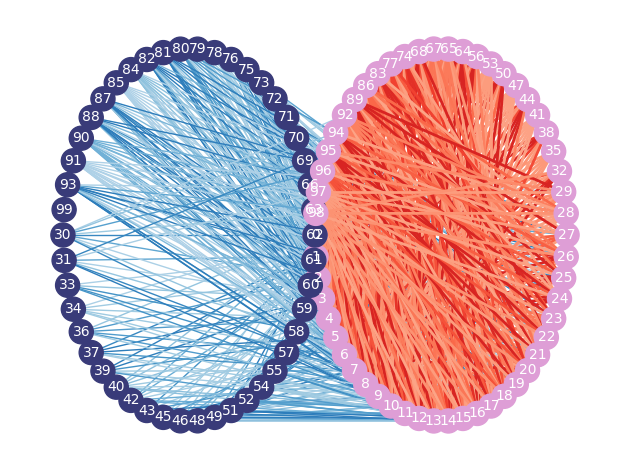

In [31]:
print(score(G, separated=True))
visualize(G)

In [36]:
write(G, str(Path(in_dir) / file), str(Path(out_dir) / f"{file[:-len('.in')]}.out"), file, score(G), k, True)

inputs/large129.in: cost 31782.31591025766 -> 24470.262246465125


In [ ]:
for i in range(100):
    tourney.move_vertex_greedy(2)
print(tourney.state.get_scores())

In [149]:
tourney.set_schedule(tourney.auto(minutes=0.7,steps=1000))
tourney.anneal()


 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.49000      14313.85     1.60%     0.00%     0:00:05     0:00:37
 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 48000.00000      14313.85                         0:00:00            

(<__main__.GraphPartitioner.StateObject at 0x15f6b3250>, 14313.853839147427)